In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/skripsi 1/Klasifikasi/data/fulldata.csv')

In [ ]:
df_for_classification = df.copy()
df_for_classification.head()

,NO,TANGGAL PELAKSANAAN,TANGGAL LAHIR,JENIS KELAMIN,BERAT BADAN,TINGGI BADAN,BODY MASS INDEX,KESIMPULAN BMI,TEKANAN DARAH,KESIMPULAN TEKANAN DARAH,...,HBsAg,RADIOLOGI,USG ABDOMEN,EKG,AUDIOMETRI,SPIROMETRI,FISIK,JUDGEMENT,ANJURAN,JANTUNG
0,1,31/01/2025,07/09/1974,Laki-Laki,81,156,33.3,Obesitas,121/60,2,...,Non Reaktif,Dalam batas normal,"Mild fatty liver, Hydronephrosis renal sinistra",Left Ventricular Hypertrophy (LVH),Telinga Kanan dan Telinga Kiri : Gangguan pend...,Restriksi Ringan dan Obstruksi Ringan,"Mata : Visus OD 20/160 OS 20/20, BMI : Obesita...",Temporary Unfit,"- Atur pola hidup sehat, Hindari makanan tingg...",1
1,2,31/01/2025,30/12/1978,Perempuan,63,146,29.6,Obesitas,117/77,1,...,Non Reaktif,Dalam batas normal,Lesi isoechoic dinding anterior uterus sugesti...,Sinus rhythm with PAC,Telinga kanan dan Telinga kiri : Dalam batas n...,Dalam Batas Normal,"BMI : Obesitas, Gigi : Kalkulus,Gigi palsu, Ma...",Fit With Note,Atur pola hidup sehat\nHindari makanan tinggi ...,1
2,3,31/01/2025,14/09/1979,Laki-Laki,96,157,38.9,Obesitas,130/90,3,...,Non Reaktif,Dalam batas normal,Mild fatty liver,Left Ventricular Hypertrophy (LVH),Telinga kanan dan Telinga kiri : Dalam batas n...,Dalam Batas Normal,"BMI : Obesitas, TD (130/90) Hipertensi grade 1...",Temporary Unfit,"- Atur pola hidup sehat, Hindari makanan tingg...",1
3,4,31/01/2025,16/09/1978,Perempuan,72,150,32.0,Obesitas,150/95,3,...,Non Reaktif,Dalam batas normal,"Mild fatty liver, Kista ukuran +/- 2.6 x 2.4 c...",Dalam Batas Normal,Telinga kanan dan Telinga kiri : Dalam batas n...,Dalam Batas Normal,"Mata : Konjungtiva anemis, Kacamata Visus OD 2...",Fit With Note,Atur pola hidup sehat\nHindari makanan tinggi ...,1
4,5,31/01/2025,06/07/1978,Perempuan,63,142,31.2,Obesitas,143/99,3,...,Non Reaktif,Dalam batas normal,Kista multiple renal sinistra,Left Ventricular Hypertrophy (LVH),Telinga Kanan dan Telinga Kiri : Gangguan pend...,Obstruksi Ringan,"BMI : Obesitas, TD (143/99) Hipertensi grade 1...",Temporary Unfit,- Konsultasi dokter spesialis Urologi terkait ...,1


In [ ]:
# Mengubah kolom 'TANGGAL LAHIR' menjadi format datetime dengan format hari/bulan/tahun
df_for_classification['TANGGAL LAHIR'] = pd.to_datetime(df_for_classification['TANGGAL LAHIR'], format='%d/%m/%Y', errors='coerce')

# Mengubah kolom 'TANGGAL PELAKSANAAN' menjadi format datetime dengan format hari/bulan/tahun
df_for_classification['TANGGAL PELAKSANAAN'] = pd.to_datetime(df_for_classification['TANGGAL PELAKSANAAN'], format='%d/%m/%Y', errors='coerce')

# Menghitung umur berdasarkan selisih tanggal pelaksanaan dan tanggal lahir dalam satuan tahun
df_for_classification['UMUR'] = (df_for_classification['TANGGAL PELAKSANAAN'] - df_for_classification['TANGGAL LAHIR']).dt.days // 365

# Memisahkan nilai tekanan darah menjadi dua kolom: sistolik dan diastolik
df_for_classification[['TEKANAN SISTOLIK', 'TEKANAN DIASTOLIK']] = df_for_classification['TEKANAN DARAH'].str.split('/', expand=True)

# Memisahkan nilai visus mata kiri menjadi pembilang dan penyebut
df_for_classification[['VISUS KIRI NUMERATOR', 'VISUS KIRI DENOMINATOR']] = df_for_classification['VISUS MATA KIRI'].str.split('/', expand=True)

# Memisahkan nilai visus mata kanan menjadi pembilang dan penyebut
df_for_classification[['VISUS KANAN NUMERATOR', 'VISUS KANAN DENOMINATOR']] = df_for_classification['VISUS MATA KANAN'].str.split('/', expand=True)


In [ ]:
# Mengubah nilai kategorikal pada kolom 'JENIS KELAMIN' menjadi numerik: Laki-Laki = 0, Perempuan = 1
df_for_classification['JENIS KELAMIN'] = df_for_classification['JENIS KELAMIN'].map({'Laki-Laki': 0, 'Perempuan': 1})

# Mengubah nilai kategorikal pada kolom 'PEMERIKSAAN VISUS' menjadi numerik: Tanpa kacamata = 0, Dengan kacamata = 1
df_for_classification['PEMERIKSAAN VISUS'] = df_for_classification['PEMERIKSAAN VISUS'].map({'Tanpa kacamata': 0, 'Dengan kacamata': 1})

# Mengubah nilai kategorikal pada kolom 'DAYA LIHAT WARNA' menjadi numerik: Negatif = 0, Positif = 1
df_for_classification['DAYA LIHAT WARNA'] = df_for_classification['DAYA LIHAT WARNA'].map({'Negatif': 0, 'Positif': 1})

**HAPUS KOLOM**

In [ ]:
df_for_classification.drop(columns=['TANGGAL LAHIR',
                                    'TANGGAL PELAKSANAAN',
                                    'NO',
                                    'BERAT BADAN',
                                    'TINGGI BADAN',
                                    'KESIMPULAN BMI',
                                    'TEKANAN DARAH',
                                    'KESIMPULAN TEKANAN DARAH',
                                    'KEADAAN UMUM',
                                    'VISUS MATA KIRI',
                                    'VISUS MATA KANAN',
                                    'MULUT',
                                    'KESIMPULAN THT',
                                    'FISIK',
                                    'TELINGA',
                                    'EKG',
                                    'HIDUNG',
                                    'ANJURAN',
                                    'LEHER',
                                    'GIGI',
                                    'KESIMPULAN GIGI DAN MULUT',
                                    'PARU- PARU',
                                    'ABDOMEN',
                                    'EKSTREMITAS ATAS',
                                    'EKSTREMITAS BAWAH',
                                    'KESIMPULAN TEMUAN FISIK LAINNYA',
                                    'KESIMPULAN MATA',
                                    'URINE',
                                    'LAINNYA',''
                                    'RADIOLOGI', 'DARAH', 'HBsAg', 'USG ABDOMEN', 'AUDIOMETRI', 'SPIROMETRI', 'JUDGEMENT', 'MATA',
                                    'VISUS KANAN NUMERATOR',
                                    'VISUS KIRI NUMERATOR'
                                    ], inplace=True)

In [ ]:
for col in df_for_classification.columns :
    df_for_classification[col] = df_for_classification[col].astype(float)

Cek Outlier - Untuk menentukan jenis feature scaling yang cocok

In [ ]:
def check_outlier(data, column) :
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return len(outliers)

In [ ]:
outlier_df = pd.DataFrame(columns = ['jumlah outlier'])
kolom_numerik = ['BODY MASS INDEX', 'DENYUT NADI', 'SUHU', 'UMUR', 'TEKANAN SISTOLIK', 'TEKANAN DIASTOLIK', 'VISUS KIRI DENOMINATOR', 'VISUS KANAN DENOMINATOR']

for column in kolom_numerik :
    outlier_df.loc[column, 'jumlah outlier'] = check_outlier(df_for_classification, column)

Feature Scaling

In [ ]:
outlier_df

,jumlah outlier
BODY MASS INDEX,7
DENYUT NADI,6
SUHU,2
UMUR,0
TEKANAN SISTOLIK,1
TEKANAN DIASTOLIK,5
VISUS KIRI DENOMINATOR,72
VISUS KANAN DENOMINATOR,48


In [ ]:
# Membuat objek StandardScaler untuk menormalisasi kolom numerik dengan distribusi normal
ss_bmi    = StandardScaler()
ss_dn     = StandardScaler()
ss_suhu   = StandardScaler()
ss_umur   = StandardScaler()
ss_ts     = StandardScaler()
ss_td     = StandardScaler()
ss_vkiri  = StandardScaler()
ss_vkanan = StandardScaler()


rs_vkiri  = RobustScaler()
rs_vkanan = RobustScaler()

# Menormalisasi kolom menggunakan StandardScaler
df_for_classification['BODY MASS INDEX'] = ss_bmi.fit_transform(df_for_classification[['BODY MASS INDEX']])
df_for_classification['DENYUT NADI'] = ss_dn.fit_transform(df_for_classification[['DENYUT NADI']])
df_for_classification['SUHU'] = ss_suhu.fit_transform(df_for_classification[['SUHU']])
df_for_classification['UMUR'] = ss_umur.fit_transform(df_for_classification[['UMUR']])
df_for_classification['TEKANAN SISTOLIK'] = ss_ts.fit_transform(df_for_classification[['TEKANAN SISTOLIK']])
df_for_classification['TEKANAN DIASTOLIK'] = ss_td.fit_transform(df_for_classification[['TEKANAN DIASTOLIK']])

# Menormalkan kolom menggunakan RobustScaler karena mengandung outlier
df_for_classification['VISUS KIRI DENOMINATOR'] = rs_vkiri.fit_transform(df_for_classification[['VISUS KIRI DENOMINATOR']])
df_for_classification['VISUS KANAN DENOMINATOR'] = rs_vkanan.fit_transform(df_for_classification[['VISUS KANAN DENOMINATOR']])

In [ ]:
df_for_classification

,JENIS KELAMIN,BODY MASS INDEX,DENYUT NADI,SUHU,PEMERIKSAAN VISUS,DAYA LIHAT WARNA,JANTUNG,UMUR,TEKANAN SISTOLIK,TEKANAN DIASTOLIK,VISUS KIRI DENOMINATOR,VISUS KANAN DENOMINATOR
0,0.0,1.190628,-0.794520,-0.056574,0.0,0.0,1.0,1.666474,-0.377367,-1.819085,0.0,7.00
1,1.0,0.517043,-1.286727,-1.748883,0.0,0.0,1.0,1.197544,-0.615449,-0.441640,0.0,0.00
2,0.0,2.210107,-0.091369,1.212657,0.0,0.0,1.0,1.080311,0.158318,0.611701,0.5,1.00
3,1.0,0.953963,0.119577,-0.056574,1.0,0.0,1.0,1.197544,1.348729,1.016831,1.0,0.25
4,1.0,0.808323,1.244619,0.366503,1.0,0.0,1.0,1.197544,0.932085,1.340936,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.0,1.318062,-1.286727,1.635734,0.0,0.0,0.0,1.666474,1.586811,1.746067,5.0,5.00
359,0.0,-0.684486,-1.216411,0.366503,0.0,0.0,0.0,-0.912642,-0.674970,-0.603692,0.0,0.25
360,1.0,-1.412686,-0.372629,0.789580,0.0,0.0,0.0,-1.498804,-1.091614,-1.657032,0.0,0.00
361,0.0,-0.866536,-1.427357,0.366503,0.0,0.0,0.0,-1.029874,-0.972573,-1.170875,1.5,0.00


In [ ]:
df_for_classification.dropna(axis = 0, inplace = True)

In [ ]:
X = df_for_classification.drop(columns = ['JANTUNG'])
y = df_for_classification['JANTUNG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) # Split dengan stratifikasi

MODEL

KNN 3 Neighbors

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
train_acc_3 = knn_3.score(X_train, y_train)
test_acc_3 = knn_3.score(X_test, y_test)

train_acc_3, test_acc_3

(0.9018181818181819, 0.8985507246376812)

In [ ]:
classification_report_3 = classification_report(y_test, knn_3.predict(X_test), output_dict=True)
classification_report_3

{'0.0': {'precision': 0.9777777777777777,
  'recall': 0.88,
  'f1-score': 0.9263157894736842,
  'support': 50.0},
 '1.0': {'precision': 0.75,
  'recall': 0.9473684210526315,
  'f1-score': 0.8372093023255814,
  'support': 19.0},
 'accuracy': 0.8985507246376812,
 'macro avg': {'precision': 0.8638888888888889,
  'recall': 0.9136842105263158,
  'f1-score': 0.8817625458996328,
  'support': 69.0},
 'weighted avg': {'precision': 0.9150563607085346,
  'recall': 0.8985507246376812,
  'f1-score': 0.9017792205488443,
  'support': 69.0}}

KNN 5 Neighbors

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
train_acc_5 = knn_5.score(X_train, y_train)
test_acc_5 = knn_5.score(X_test, y_test)

train_acc_5, test_acc_5

(0.8945454545454545, 0.8695652173913043)

KNN 10 Neighbors

In [ ]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)

train_acc_10 = knn_10.score(X_train, y_train)
test_acc_10 = knn_10.score(X_test, y_test)

train_acc_10, test_acc_10

(0.88, 0.8405797101449275)

Decision Tree 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_3 = DecisionTreeClassifier()
decision_tree_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_3 = DecisionTreeClassifier(max_depth = 3)
decision_tree_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
test_acc_3 = decision_tree_3.score(X_test, y_test)

train_acc_3, test_acc_3

(0.9018181818181819, 0.8840579710144928)

Decision Tree 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_5 = DecisionTreeClassifier(max_depth = 5)
decision_tree_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
test_acc_5 = decision_tree_5.score(X_test, y_test)

train_acc_5, test_acc_5

(0.8945454545454545, 0.855072463768116)

Decision Tree 10

In [ ]:
decision_tree_10 = KNeighborsClassifier(n_neighbors=10)
decision_tree_10.fit(X_train, y_train)

train_acc_10 = decision_tree_10.score(X_train, y_train)
test_acc_10 = decision_tree_10.score(X_test, y_test)
train_acc_10, test_acc_10

(0.88, 0.8405797101449275)

NUMERIC

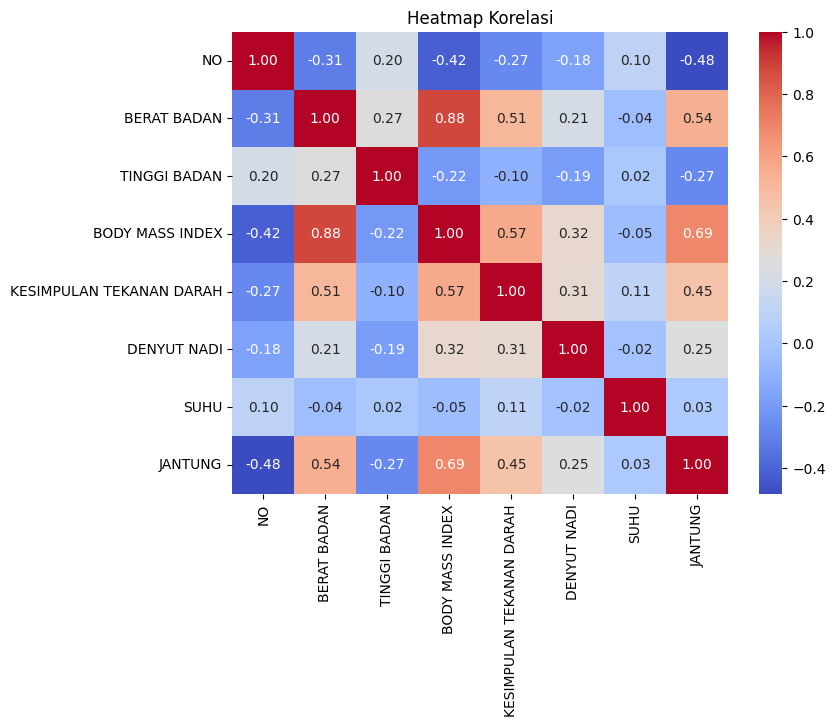

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

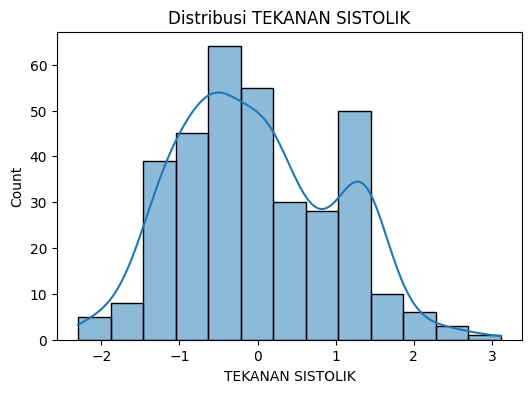

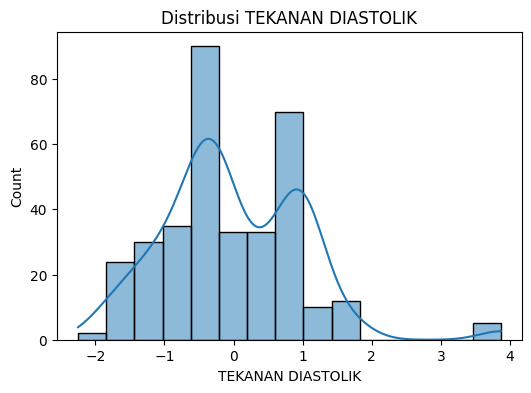

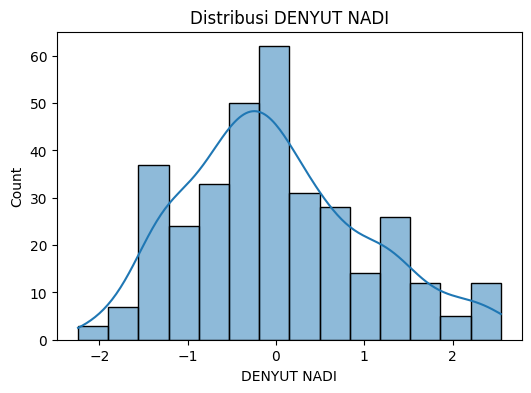

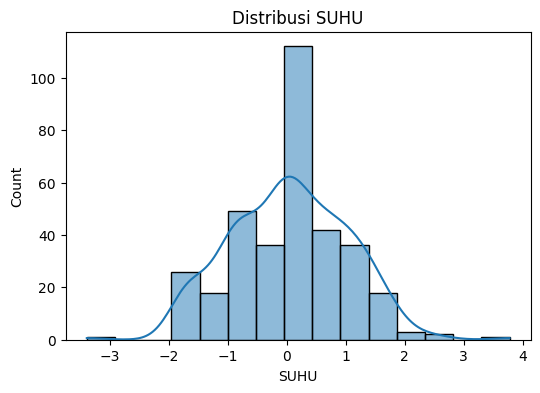

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib for plt

# ... (rest of your previous code) ...

# %%
# This code block was causing the error because it was trying to access columns
# in the original 'df' dataframe that were created or modified in 'df_for_classification'.
# Change 'df' to 'df_for_classification' to plot the correct data.

num_cols = ['TEKANAN SISTOLIK', 'TEKANAN DIASTOLIK', 'DENYUT NADI', 'SUHU']  # ganti dengan kolom numerik MCU kamu

for col in num_cols:
    plt.figure(figsize=(6,4))
    # Use df_for_classification instead of df
    sns.histplot(df_for_classification[col].dropna(), kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

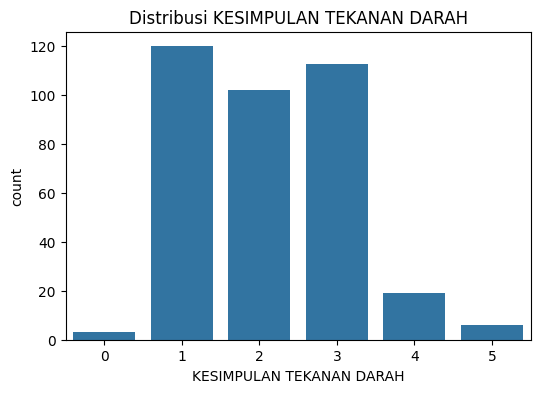

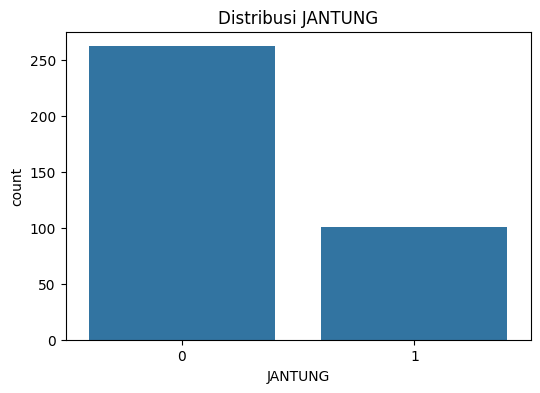

In [ ]:
cat_cols = ['KESIMPULAN TEKANAN DARAH', 'JANTUNG']  # ganti dengan kolom kategorikal MCU kamu
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.show()

In [ ]:
for col in df.columns:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("="*50)


Kolom: NO
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [ ]:
!y_pred = model.predict(X_test)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `y_pred = model.predict(X_test)'


In [ ]:
# Assuming you want to use the knn_10 model for prediction
model = knn_10

# Calculate y_pred using the trained model
y_pred = model.predict(X_test)

# Buat DataFrame hasil
hasil = X_test.copy()
hasil['Kondisi Asli'] = y_test.values
hasil['Prediksi'] = y_pred

# Lihat 10 baris pertama hasil prediksi
hasil.head(10)


,JENIS KELAMIN,BODY MASS INDEX,DENYUT NADI,SUHU,PEMERIKSAAN VISUS,DAYA LIHAT WARNA,UMUR,TEKANAN SISTOLIK,TEKANAN DIASTOLIK,VISUS KIRI DENOMINATOR,VISUS KANAN DENOMINATOR,Kondisi Asli,Prediksi
355,0.0,-0.684486,-1.216411,0.366503,0.0,0.0,-0.912642,-0.674970,-0.603692,0.00,0.25,0.0,0.0
96,0.0,0.881143,-0.794520,-0.056574,0.0,0.0,1.666474,1.348729,1.016831,0.00,7.00,1.0,0.0
300,1.0,-0.684486,-0.372629,-0.056574,0.0,0.0,-1.147107,-1.329696,-1.008823,0.00,0.00,0.0,0.0
17,0.0,1.627547,-0.653890,1.212657,1.0,0.0,2.018171,1.348729,1.016831,0.00,1.00,1.0,1.0
62,1.0,1.354472,1.455565,-0.056574,1.0,0.0,-0.795409,0.277359,1.016831,3.00,3.00,1.0,1.0
1,1.0,0.517043,-1.286727,-1.748883,0.0,0.0,1.197544,-0.615449,-0.441640,0.00,0.00,1.0,0.0
51,1.0,0.608068,0.119577,-0.056574,1.0,0.0,1.197544,0.396400,0.935805,1.00,0.25,1.0,1.0
303,0.0,0.007303,-0.442945,-1.325806,0.0,0.0,-0.795409,1.467770,1.259910,5.00,5.00,0.0,0.0
120,0.0,0.808323,2.229032,-0.479651,0.0,0.0,0.963079,-1.329696,-0.441640,0.25,0.00,0.0,1.0
319,1.0,-1.048586,0.541468,-1.325806,0.0,0.0,-1.264339,-0.794011,-0.198561,0.00,0.00,0.0,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[45  5]
 [ 6 13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        50
         1.0       0.72      0.68      0.70        19

    accuracy                           0.84        69
   macro avg       0.80      0.79      0.80        69
weighted avg       0.84      0.84      0.84        69



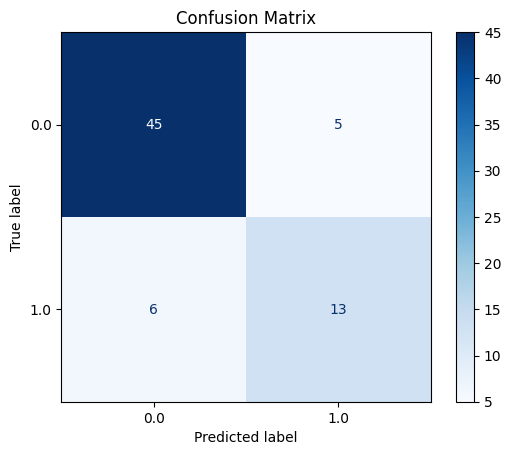

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix (Visual)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
